# 🛍️ Global Superstore Sales Analysis (EDA Project)


In [2]:
"""import all the below libraries 
pandas (pd)	Data manipulation	Load, clean, analyze tabular data
numpy (np)	Numerical processing	Math functions, arrays, stats
matplotlib.pyplot (plt)	Plotting/visualization	Line/bar/pie/scatter plots
seaborn (sns)	Advanced visualization	Heatmaps, boxplots, statistical plots"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_excel(r"C:\Users\Bhavana\OneDrive\Documents\DataAnalytics\projects\Global Superstore.xls")
df.head() # shows first 5 rows
df.shape #This gives you the dimensions of your DataFrame in the format -> (rows, columns)
df.info() #It shows a summary of the DataFrame
df.describe() #Gives you summary statistics for all the numerical columns in your DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  LookupKey       9994 non-null   object        
 13  Market          51290 non-null  object        
 14  Region          51290 non-null  object        
 15  Pr

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55189.376426,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32065.263110,487.565361,2.278766,0.212280,174.340972,57.296810


## 🧹 Data Cleaning


In [11]:
print(df.isnull().sum().sort_values(ascending=False));

LookupKey         41296
Postal Code       41296
Market                0
Shipping Cost         0
Profit                0
Discount              0
Quantity              0
Sales                 0
Product Name          0
Sub-Category          0
Category              0
Product ID            0
Region                0
Row ID                0
Order ID              0
Country               0
State                 0
City                  0
Segment               0
Customer Name         0
Customer ID           0
Ship Mode             0
Ship Date             0
Order Date            0
Order Priority        0
dtype: int64


In [19]:
df.drop(['Row ID'] , axis = 1, inplace = True);

In [20]:
print(df.columns.tolist())

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print(df['Ship Date'].head())

0   2012-07-31
1   2013-02-07
2   2013-10-18
3   2013-01-30
4   2013-11-06
Name: Ship Date, dtype: datetime64[ns]


In [25]:
print(df.duplicated().sum())

0


In [28]:
print("Total Sales : ₹" , round(df['Sales'].sum() , 2))
print("Total Profit : ₹" , round(df['Profit'].sum(),2))
print("Total Quantity Sold : ₹", round(df['Quantity'].sum(),2))

Total Sales : ₹ 12642501.91
Total Profit : ₹ 1467457.29
Total Quantity Sold : ₹ 178312


 ## Exploratory Data Analysis (EDA)

### 📆 2.1. Sales Trend Over the Years

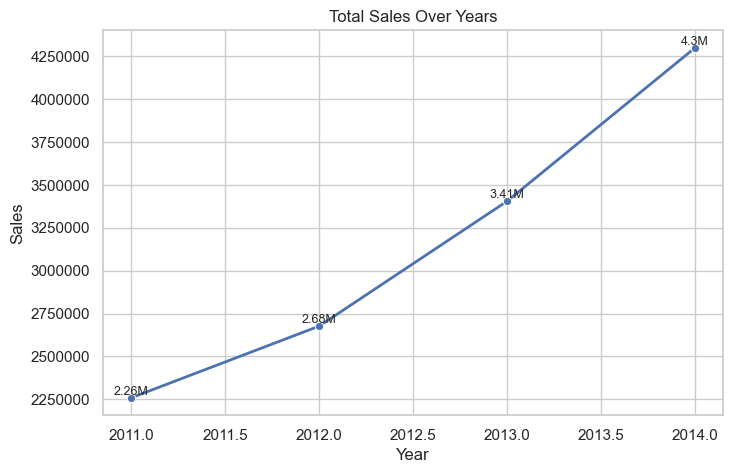

In [51]:
# TOTAL SALES BY YEAR 

import warnings
warnings.filterwarnings("ignore")


df['Year'] = df['Order Date'].dt.year # extracts only year from order date and create new column for it as Year
yearly_sales = df.groupby('Year')['Sales'].sum() # group the sales by year

plt.figure(figsize=(8,5)) # Creates a blank canvas for your chart 8 inches width and 5 inces height
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker = 'o', linewidth = 2) # creates a lineplot using seaborn (sns) 

plt.title('Total Sales Over Years') # title of the line chart
plt.xlabel('Year') # x axis name 
plt.ylabel('Sales') # y axis name
plt.grid(True) # shows grid lines for better understanding

for x, y in zip(yearly_sales.index , yearly_sales.values) : #Add value labels to the data points:
    plt.text(x,y, f'{round(y/1e6 ,2)}M' , ha = 'center' , va = 'bottom' , fontsize =9)

plt.ticklabel_format(style = "plain" , axis = 'y') # Stops scientific notation
plt.savefig("images/SalesOverYr.png")
plt.show() # shows the final chart



## Total Profit Over Years

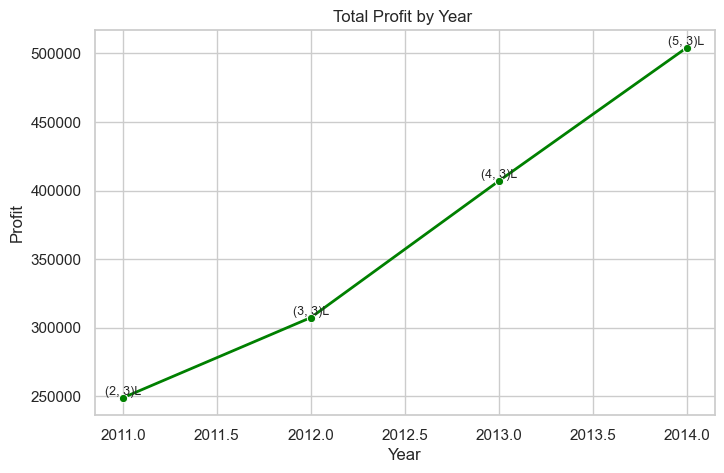

In [52]:
# TOTAL PROFIT BY YEAR

yearly_profit = df.groupby('Year')['Profit'].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_profit.index , y=yearly_profit.values, marker ='o' , color ='green' , linewidth=2)

plt.title("Total Profit by Year ")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.grid(True)

for x , y in zip(yearly_profit.index , yearly_profit.values):
    plt.text(x , y , f'{round(y/1e5),3}L' , ha = 'center' , va = 'bottom' , fontsize =9)
    plt.savefig("images/ProfitOverYr.png")
plt.show()

## Sales by Category and Sub-Category

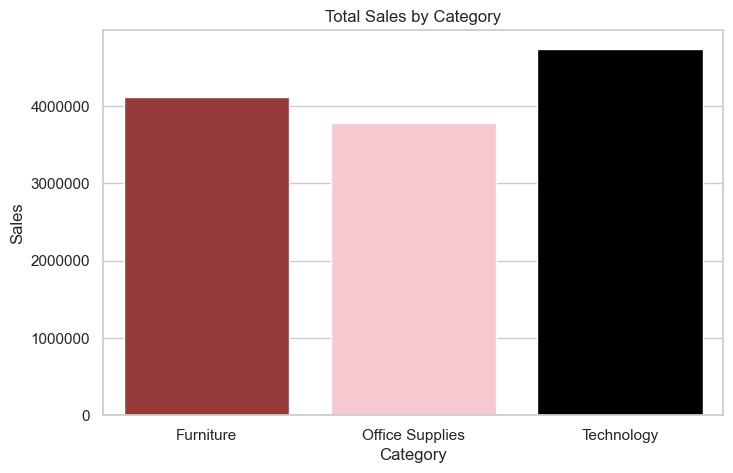

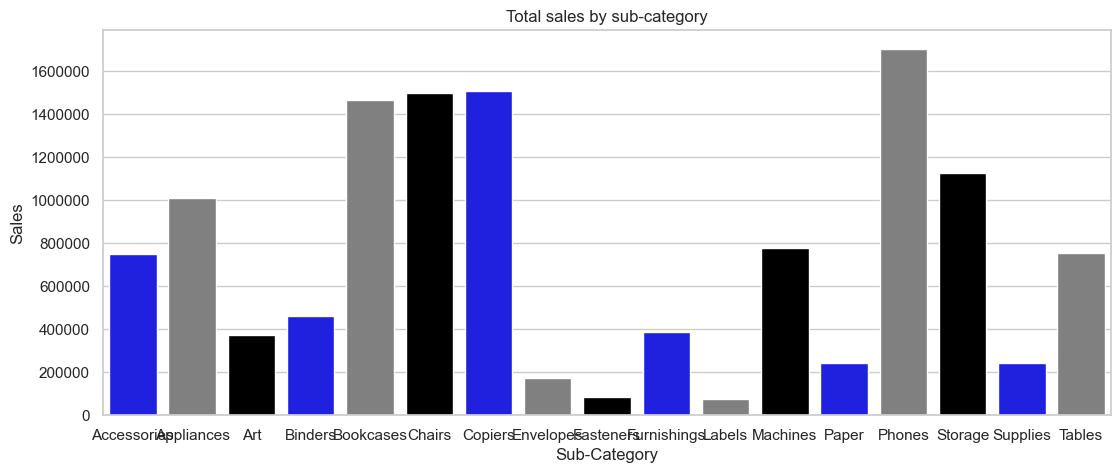

In [53]:
# SALES BY CATEGORY

sales_by_category = df.groupby('Category')['Sales'].sum()

custom_colors = ['brown', 'pink', 'black']

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values , palette = custom_colors)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.ticklabel_format(style="plain" , axis='y')
plt.savefig("images/SalesByCategory.png")
plt.show()

#SALES BY SUBCATEGORY

sales_by_sub_category = df.groupby('Sub-Category')['Sales'].sum()

custom_colors = ['blue' , 'grey' , 'black']

plt.figure(figsize=(13,5))
sns.barplot(x=sales_by_sub_category.index , y=sales_by_sub_category.values , palette = custom_colors)
plt.title("Total sales by sub-category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.ticklabel_format(style="plain", axis='y')
plt.savefig("images/SalesbySubCategory.png")
plt.show()

## Top 10 Countries by Sales

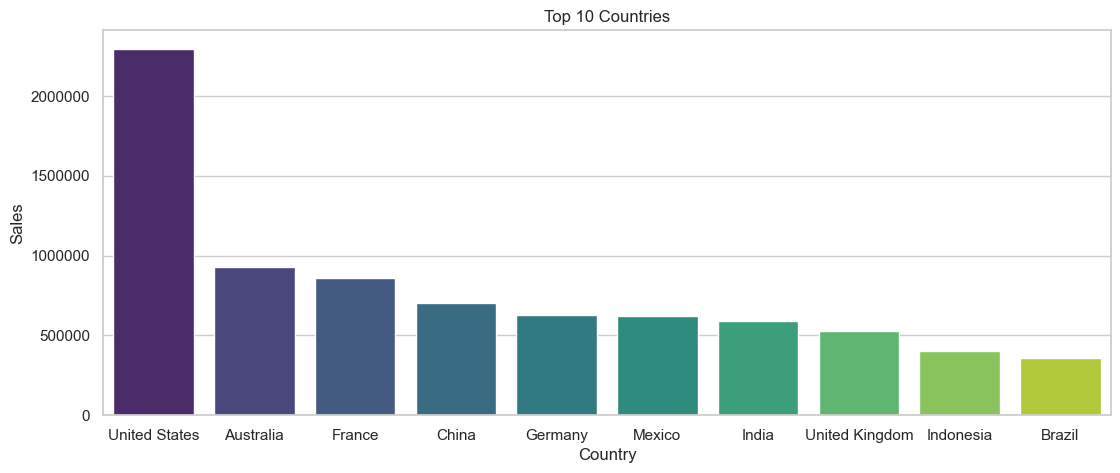

In [54]:
# Top 10 Countries 

top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x=top_countries.index , y=top_countries.values , palette='viridis')
plt.title("Top 10 Countries")
plt.xlabel('Country')
plt.ylabel('Sales')
plt.ticklabel_format(style="plain" , axis='y')
plt.savefig("images/TopCountriesBysales.png")
plt.show()

## Orders based on Shipping Mode

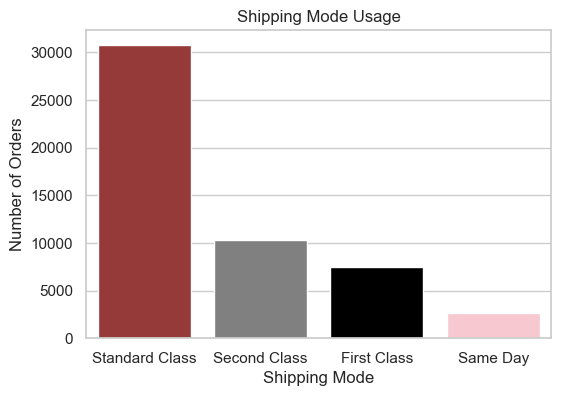

In [55]:
# shipping mode distribution(how many orders are placed in each shipmode

plt.figure(figsize=(6,4))
custom_colors = ['brown' , 'grey' , 'black' , 'pink']
sns.countplot(data=df , x='Ship Mode', order = df['Ship Mode'].value_counts().index , palette =custom_colors)
#sns.countplot()	 Draws a bar plot showing the count of each shipping mode
#data=df		 Tells seaborn to use your cleaned Global Superstore data
#x='Ship Mode'	 Sets the X-axis to show different shipping modes
#order=...	 Ensures the bars are sorted by count, from most used to least used
#palette='pastel' Sets a soft color theme for better visual appeal
#.index is like saying:
#Give me just the category names, sorted by how often they appear

plt.title('Shipping Mode Usage')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.savefig("images/OrderesOnShippingMode.png")
plt.show()

## Discount vs Profit

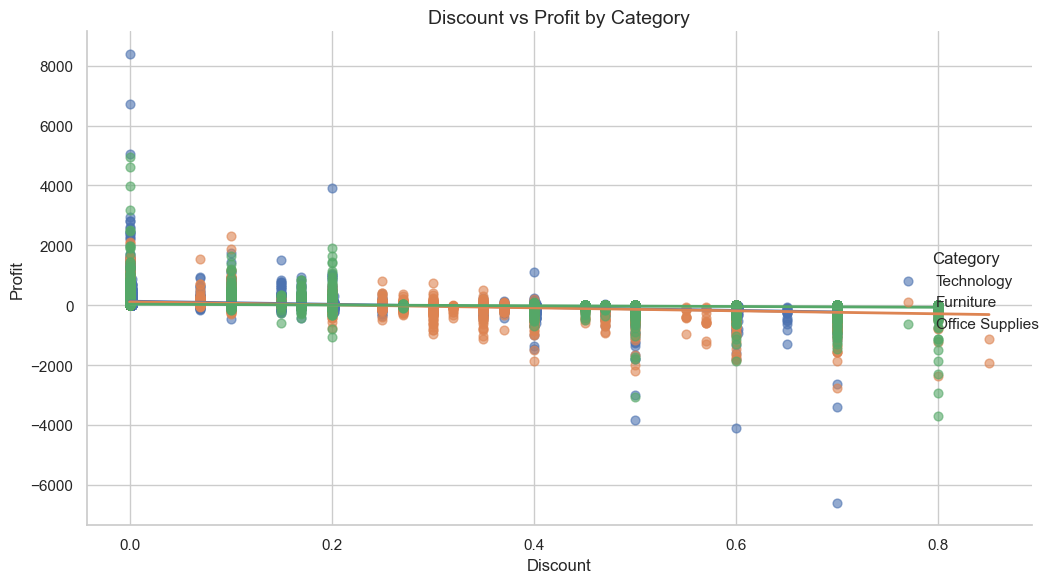

In [59]:
# Discount vs Profit (Scatter plot)

# Create a clearer lmplot
sns.set(style="whitegrid")  # Clean background
plot = sns.lmplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Category',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 's': 40},   # Dots: transparent and larger
    line_kws={'linewidth': 2}              # Trendlines: thicker
)

# Titles and labels
plot.set_axis_labels("Discount", "Profit")
plt.title('Discount vs Profit by Category', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/DiscountVsProfit.png")
plt.show()


## Top and Bottom Ten Products by Profit

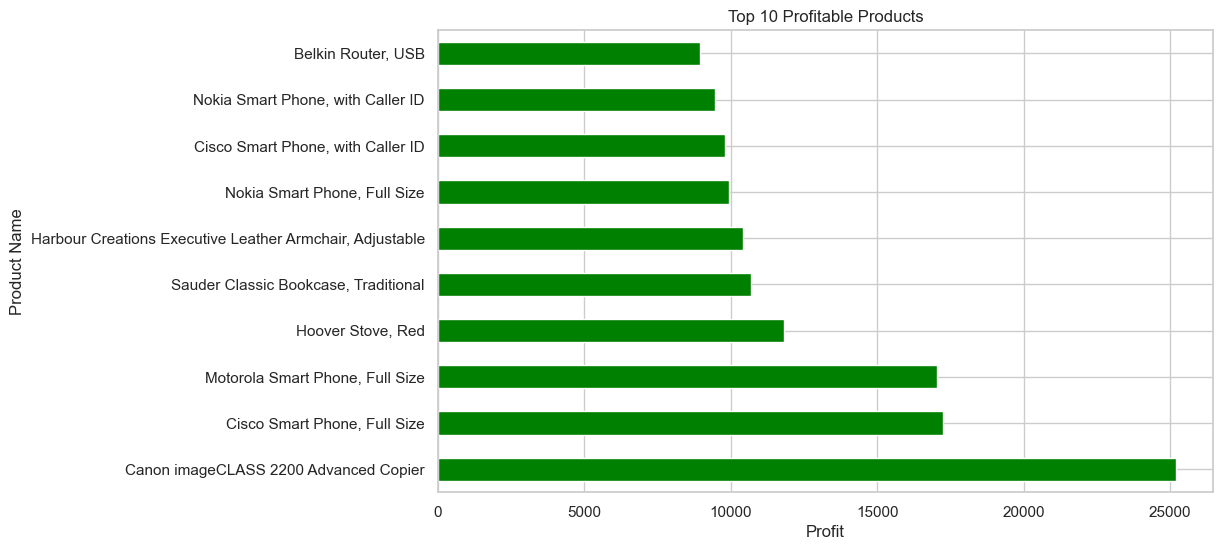

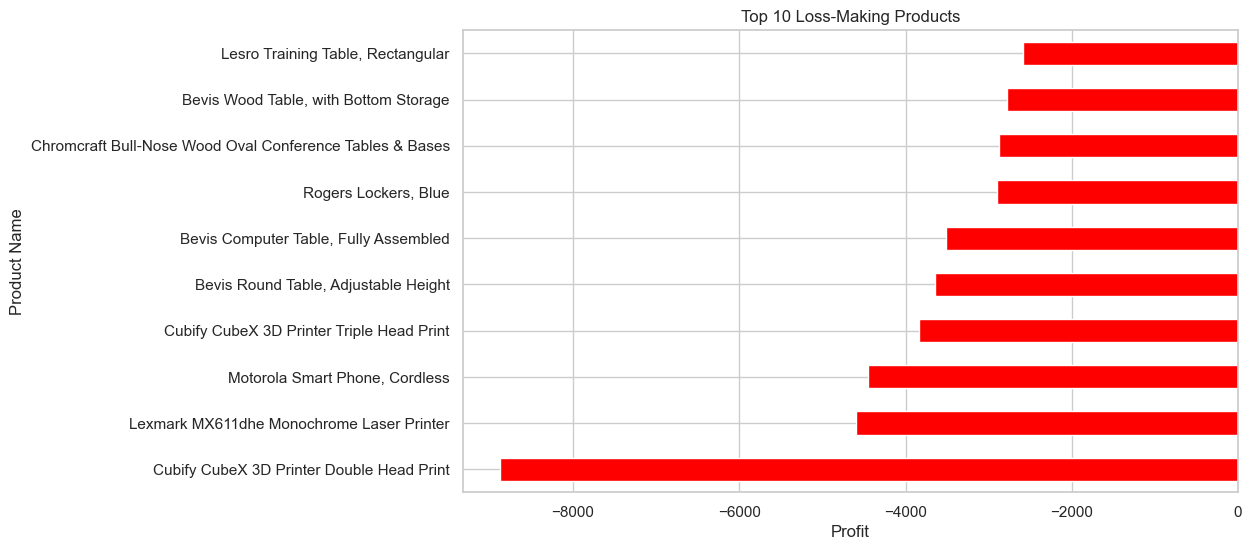

In [60]:
# Top 10 Products
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='green')
plt.title("Top 10 Profitable Products")
plt.xlabel("Profit")
plt.savefig("images/TopTenProdByProfit.png")
plt.show()

# Bottom 10 Products
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

plt.figure(figsize=(10,6))
bottom_products.plot(kind='barh', color='red')
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Profit")
plt.savefig("images/BottomProdByProfit.png")
plt.show()


## Segment wise Order Count & Region-wise Sales

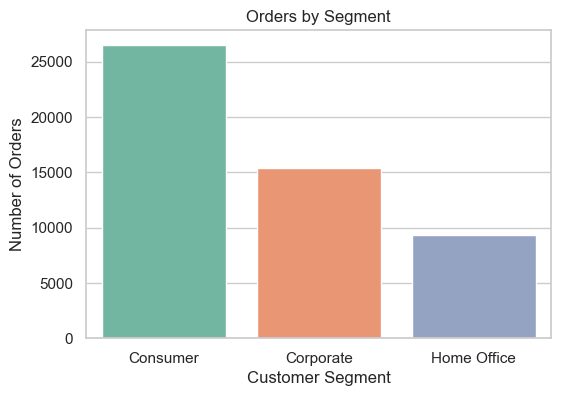

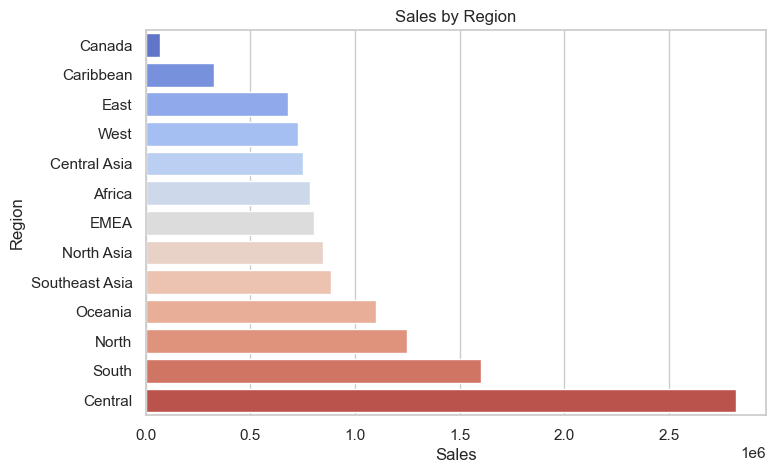

In [61]:
#Segment and Region Insights

# Segment-wise Order Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Segment', palette='Set2')
plt.title("Orders by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Orders")
plt.savefig("images/SegWiseOrderCount.png")
plt.show()

# Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title("Sales by Region")
plt.xlabel("Sales")
plt.ylabel("Region")
plt.savefig("images/RegionWiseSales.png")
plt.show()


In [49]:
import os
os.makedirs("images", exist_ok=True)

In [1]:
import os
os.getcwd()

'C:\\Users\\Bhavana'

In [62]:
df.to_excel("Global_Superstore_Cleaned.xlsx", index=False)

# 💡 Final Insights

# 📊 Global Superstore Project – Insight Summary

### 🧹 Data Overview:
- The dataset contains **51,290 records** with features like Order Date, Segment, Region, Product, Profit, Sales, Discount, Shipping Cost, and more.
- Data ranges from **2011 to 2015**, across global markets and product categories.

---

### 🔍 EDA Insights:

#### 1. 🗓 Year-wise Sales and Profit Trends
- Sales and profits increased steadily between **2011 to 2014**.
- **2014** had the highest number of orders and total sales.

#### 2. 🌍 Country & Regional Analysis
- **United States** dominated in both sales and profit.
- Among regions, the **West** region showed the highest profit and volume.
- Some regions like **Africa and Oceania** contributed very little.

#### 3. 📦 Product Category Insights
- **Technology** was the most profitable category overall.
- **Furniture** had high sales volume but relatively low or even negative profits — likely due to discounts or higher shipping costs.
- **Chairs**, **Tables**, and **Bookcases** in Furniture had some of the lowest margins.

#### 4. 💸 Discounts and Profitability
- Orders with **high discounts (above 30%)** mostly resulted in losses.
- **Zero or low-discount** orders were consistently profitable.
- There's a clear inverse relationship between discount and profit.

#### 5. 🚚 Shipping Costs
- Higher **shipping cost** often led to **lower profit** margins.
- Some orders had unusually high shipping charges, affecting profitability.

#### 6. 🧑‍💼 Segment & Customer Insights
- **Consumer segment** made the highest number of purchases.
- However, **Corporate and Home Office segments** contributed more to overall profit.

---

### 🧠 Key Takeaways:
- Focus on growing **Technology product sales**, especially in profitable regions like the **West**.
- Revisit **Furniture pricing and discount strategy** to reduce losses.
- Optimize **logistics and shipping costs** for large or heavy items.
- Consider adjusting marketing to target **high-value segments** and top-performing regions.

---

### 📦 Next Steps:
- Create a Power BI or Tableau dashboard showing key KPIs (Year, Segment, Region, Category).
- Save cleaned dataset for future analysis or machine learning modeling.
- Add this project with summary, code, and visuals to your **GitHub portfolio** or present it to managers during interviews.
